# Summary

Data was retrieved from https://www.kaggle.com/ycanario/home-insurance and the aim was to efficinetly predict whether a policy could be lapsed. The task was treated as multiclass classification task. 


Preliminary analysis showed that the target column does not contain balanced data. One class in partcular ['unknown'] contained very small number of samples and as such was removed from the dataset.

During the preprocessing a nas were removed and the string columns were encoded. A lot of the categorical features were of ordinal nature(ordered) so the appropriate encode was chosen. 

Preliminary analysis also showed that the target column does not have any strong correlation with the rest of the data. However, feature analysis returned the 9 most prominent features in the dataset. all extracted features are of the categorical nature and violin plot analysis showed that the  classification strength probably emrges between the difference of categories 0 to [1,2], while categories 1 and two show very similar distribution.

Next, traditional modelling approaches were implemnted with the best perfomring being an ensemble of gradient boost and random forest classifier.

Training Score: 0.5997372335885098
Test Score: 0.4493687259748982
Training accuracy: 0.7860372073302601
Test accuracy: 0.743112900206928



Further to that different deep learning implementation were attmepted.

Two different architectures of batch-normalisation and regularization were constructed and both were tried for parameter optimisation. Both models were used to generate predictions on the test set and generate a confusion matrix.

Because of the imbalanced dataset the models were fitted with a custom based categorical-cross_entropy for imbalanced data. This loss function perfomred better that the usual categorical-cross-entropy loss. However, in both cases the class of interest ==1 was suffering from misclassifcation events where class 1 was confused as class 2. Similarly, class 2 was misclassified as class1.  This was somewhat expected because during the preliminary analysis we saw that those two classes have very similar distribution for the key features.

To address this class weights were set manually giving much more weight on class 2. We tested this condition on the batch-normalisation model and altough the validation loss remianed quite high the model performance was best in terms of classification power, with much more reduced levels of misclassification events.











**Comparative Results**

Regularization-Model_Weighted_Loss

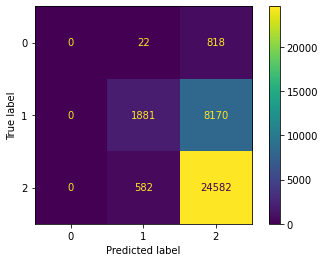

Batch_Normalisation_Weighted_loss

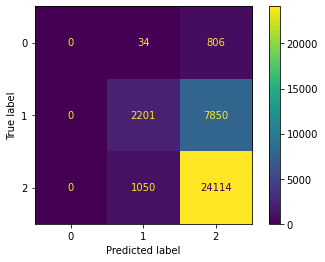

Batch_Normalisation_Weighted_Class

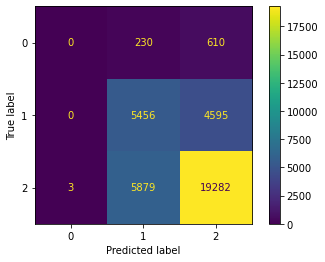

# Imports

In [ ]:
pip install category-encoders

     |████████████████████████████████| 86 kB 3.2 MB/s 


In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 3.8 MB/s 


In [ ]:

import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
import pandas as pd
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import RobustScaler
import time

from datetime import datetime
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import Perceptron
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
from  tensorflow.keras.utils import plot_model

2.8.0
2.8.0


# Part1-Preprocessing

In [ ]:
print("read data")


data = pd.read_csv('/content/drive/MyDrive/Experian_data_analysis/home_insurance.csv')


print("show first and last 10 rows")
print(data.head(10))  
print(data.tail(10))
print("show shape of data")
print(data.shape)
print("columns")
print(data.columns)
print("checking for nulls")
print(data.info())
print(sum(data.dtypes == "object"))

print(data.isna().sum()) # returns which columns are intact and which not



read data
show first and last 10 rows
   QUOTE_DATE COVER_START CLAIM3YEARS P1_EMP_STATUS P1_PT_EMP_STATUS BUS_USE  \
0  11/22/2007  22/11/2007           N             R              NaN       N   
1  11/22/2007  01/01/2008           N             E              NaN       Y   
2  11/23/2007  23/11/2007           N             E              NaN       N   
3  11/23/2007  12/12/2007           N             R              NaN       N   
4  11/22/2007  15/12/2007           N             R              NaN       N   
5  11/22/2007  01/12/2007           N             R              NaN       N   
6  11/19/2007  12/12/2007           N             R              NaN       N   
7  11/22/2007  01/12/2007           N             R              NaN       N   
8  11/22/2007  01/02/2008           N             E              NaN       N   
9  11/22/2007  01/12/2007           N             E              NaN       N   

  CLERICAL AD_BUILDINGS  RISK_RATED_AREA_B  SUM_INSURED_BUILDINGS  ...  \
0      

In [ ]:
#Find how many unique values per column

print(data.nunique())


QUOTE_DATE               1260
COVER_START              2207
CLAIM3YEARS                 2
P1_EMP_STATUS              11
P1_PT_EMP_STATUS            9
                        ...  
MTA_DATE                 1287
LAST_ANN_PREM_GROSS     37445
POL_STATUS                  4
i                      256136
Police                 256136
Length: 66, dtype: int64


In [ ]:

data.isna().sum()

QUOTE_DATE             126612
COVER_START             67115
CLAIM3YEARS             66097
P1_EMP_STATUS           67115
P1_PT_EMP_STATUS       254354
                        ...  
MTA_DATE               229561
LAST_ANN_PREM_GROSS     66097
POL_STATUS              67115
i                           0
Police                      0
Length: 66, dtype: int64

In [ ]:
print("Drop columns with high nas ")


df = data.drop(['PAYMENT_FREQUENCY' , 'CAMPAIGN_DESC','P1_PT_EMP_STATUS', 'CLERICAL', 'i', 'Police', 'MTA_FAP', 'MTA_APRP', 'MTA_DATE' , 'QUOTE_DATE', 'RISK_RATED_AREA_B','AD_CONTENTS', 'BUILDINGS_COVER'], axis=1)


df.dropna(inplace=True)
print(df.isna().sum())

Drop columns with high nas 
COVER_START               0
CLAIM3YEARS               0
P1_EMP_STATUS             0
BUS_USE                   0
AD_BUILDINGS              0
SUM_INSURED_BUILDINGS     0
NCD_GRANTED_YEARS_B       0
RISK_RATED_AREA_C         0
SUM_INSURED_CONTENTS      0
NCD_GRANTED_YEARS_C       0
CONTENTS_COVER            0
SPEC_SUM_INSURED          0
SPEC_ITEM_PREM            0
UNSPEC_HRP_PREM           0
P1_DOB                    0
P1_MAR_STATUS             0
P1_POLICY_REFUSED         0
P1_SEX                    0
APPR_ALARM                0
APPR_LOCKS                0
BEDROOMS                  0
ROOF_CONSTRUCTION         0
WALL_CONSTRUCTION         0
FLOODING                  0
LISTED                    0
MAX_DAYS_UNOCC            0
NEIGH_WATCH               0
OCC_STATUS                0
OWNERSHIP_TYPE            0
PAYING_GUESTS             0
PROP_TYPE                 0
SAFE_INSTALLED            0
SEC_DISC_REQ              0
SUBSIDENCE                0
YEARBUILT           

In [ ]:

#feature engineer age-group
df['Age_at_start'] = pd.to_datetime(df['COVER_START'])-pd.to_datetime(df['P1_DOB'])
df['Age_at_start'] = (df['Age_at_start'].dt.days /365).astype(int)

conditions = [(df.Age_at_start <30) , (df.Age_at_start >=30) & (df.Age_at_start <40),(df.Age_at_start >=40) & (df.Age_at_start <50) , (df.Age_at_start >=50) & (df.Age_at_start <60), (df.Age_at_start >=60) & (df.Age_at_start <70) , df.Age_at_start >=70]

values = ['20s', '30s', '40s', '50s', '60s',  'over70s']

df['age_group']= np.select(conditions,values)

df['COVER_START'] =pd.to_datetime(df['COVER_START'])
df.drop(['P1_DOB','Age_at_start' ],axis=1, inplace=True)

df =df.sort_index()

In [ ]:
print(df.POL_STATUS.value_counts())
df.drop(df[df.POL_STATUS =='Unknown'].index, axis =0, inplace=True)
print(df.POL_STATUS.value_counts())

Live         126287
Lapsed        49879
Cancelled      4108
Unknown          16
Name: POL_STATUS, dtype: int64
Live         126287
Lapsed        49879
Cancelled      4108
Name: POL_STATUS, dtype: int64


In [ ]:
#target column
le = preprocessing.LabelEncoder()
target_col = le.fit_transform(df.POL_STATUS)
target_col = pd.DataFrame(target_col, index = df.index)
integer_mapping = {l: i for i, l in enumerate(le.classes_)}

le_ = preprocessing.LabelEncoder()
age_group = le_.fit_transform(df.age_group)
df['age_encoded']= pd.DataFrame(age_group, index = df.index)
integer_age_mapping = {l: i for i, l in enumerate(le_.classes_)}



df.drop(['POL_STATUS', 'age_group'],axis =1, inplace=True)

In [ ]:
#Examining data types
df_types =df.dtypes
print(df_types)

COVER_START               datetime64[ns]
CLAIM3YEARS                       object
P1_EMP_STATUS                     object
BUS_USE                           object
AD_BUILDINGS                      object
SUM_INSURED_BUILDINGS            float64
NCD_GRANTED_YEARS_B              float64
RISK_RATED_AREA_C                float64
SUM_INSURED_CONTENTS             float64
NCD_GRANTED_YEARS_C              float64
CONTENTS_COVER                    object
SPEC_SUM_INSURED                 float64
SPEC_ITEM_PREM                   float64
UNSPEC_HRP_PREM                  float64
P1_MAR_STATUS                     object
P1_POLICY_REFUSED                 object
P1_SEX                            object
APPR_ALARM                        object
APPR_LOCKS                        object
BEDROOMS                         float64
ROOF_CONSTRUCTION                float64
WALL_CONSTRUCTION                float64
FLOODING                          object
LISTED                           float64
MAX_DAYS_UNOCC  

In [ ]:
numeric =df.select_dtypes(include = ['int64','float64'])
numeric_col = list(numeric.columns)
print(numeric.nunique())
print(numeric.PAYING_GUESTS.unique())
print(numeric.SUM_INSURED_BUILDINGS.unique() )

SUM_INSURED_BUILDINGS        2
NCD_GRANTED_YEARS_B         10
RISK_RATED_AREA_C           49
SUM_INSURED_CONTENTS        11
NCD_GRANTED_YEARS_C         10
SPEC_SUM_INSURED          2155
SPEC_ITEM_PREM            5473
UNSPEC_HRP_PREM           2993
BEDROOMS                     7
ROOF_CONSTRUCTION           17
WALL_CONSTRUCTION           19
LISTED                       5
MAX_DAYS_UNOCC               7
OWNERSHIP_TYPE              12
PAYING_GUESTS                2
PROP_TYPE                   36
YEARBUILT                   17
LAST_ANN_PREM_GROSS      37119
age_encoded                  6
dtype: int64
[0. 1.]
[1000000.       0.]


In [ ]:
#find categorical variables 

strings = df.columns[df.dtypes == "object"]
strings = list(strings)


strings_df= df.loc[:, strings]
print(strings_df.nunique())


print(strings_df.GARDEN_ADDON_PRE_REN.unique())
print(strings_df.HOME_EM_ADDON_PRE_REN.unique())

CLAIM3YEARS                2
P1_EMP_STATUS             11
BUS_USE                    2
AD_BUILDINGS               2
CONTENTS_COVER             2
P1_MAR_STATUS             10
P1_POLICY_REFUSED          2
P1_SEX                     3
APPR_ALARM                 2
APPR_LOCKS                 2
FLOODING                   2
NEIGH_WATCH                2
OCC_STATUS                 6
SAFE_INSTALLED             2
SEC_DISC_REQ               2
SUBSIDENCE                 2
PAYMENT_METHOD             3
LEGAL_ADDON_PRE_REN        2
LEGAL_ADDON_POST_REN       2
HOME_EM_ADDON_PRE_REN      2
HOME_EM_ADDON_POST_REN     2
GARDEN_ADDON_PRE_REN       2
GARDEN_ADDON_POST_REN      2
KEYCARE_ADDON_PRE_REN      2
KEYCARE_ADDON_POST_REN     2
HP1_ADDON_PRE_REN          2
HP1_ADDON_POST_REN         2
HP2_ADDON_PRE_REN          2
HP2_ADDON_POST_REN         2
HP3_ADDON_PRE_REN          2
HP3_ADDON_POST_REN         2
MTA_FLAG                   2
dtype: int64
['N' 'Y']
['N' 'Y']


In [ ]:
df.drop(['COVER_START'], axis=1, inplace=True)

In [ ]:


#Split Train_test

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, target_col, test_size = 0.2, shuffle =True)


X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [ ]:
#Ordinal_encoding
ordina_cols = ['NCD_GRANTED_YEARS_B', 'RISK_RATED_AREA_C','SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'BEDROOMS','LISTED', 'MAX_DAYS_UNOCC', 'YEARBUILT']



from sklearn.preprocessing import OrdinalEncoder



ordinal = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)
ordinal.fit(X_train.loc[:,ordina_cols])
X_train.loc[:,ordina_cols]  = ordinal.transform(X_train.loc[:,ordina_cols])
X_test.loc[:,ordina_cols]  = ordinal.transform(X_test.loc[:,ordina_cols])

In [ ]:
#Encoding_Data



cat_boost = ce.leave_one_out.LeaveOneOutEncoder()
cat_boost.fit(X_train.iloc[:,:],y_train)
X_train_enc= cat_boost.transform(X_train.iloc[:,:])
X_test_enc = cat_boost.transform(X_test.iloc[:,:])
cat_boost.get_feature_names()


['CLAIM3YEARS',
 'P1_EMP_STATUS',
 'BUS_USE',
 'AD_BUILDINGS',
 'SUM_INSURED_BUILDINGS',
 'NCD_GRANTED_YEARS_B',
 'RISK_RATED_AREA_C',
 'SUM_INSURED_CONTENTS',
 'NCD_GRANTED_YEARS_C',
 'CONTENTS_COVER',
 'SPEC_SUM_INSURED',
 'SPEC_ITEM_PREM',
 'UNSPEC_HRP_PREM',
 'P1_MAR_STATUS',
 'P1_POLICY_REFUSED',
 'P1_SEX',
 'APPR_ALARM',
 'APPR_LOCKS',
 'BEDROOMS',
 'ROOF_CONSTRUCTION',
 'WALL_CONSTRUCTION',
 'FLOODING',
 'LISTED',
 'MAX_DAYS_UNOCC',
 'NEIGH_WATCH',
 'OCC_STATUS',
 'OWNERSHIP_TYPE',
 'PAYING_GUESTS',
 'PROP_TYPE',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 'SUBSIDENCE',
 'YEARBUILT',
 'PAYMENT_METHOD',
 'LEGAL_ADDON_PRE_REN',
 'LEGAL_ADDON_POST_REN',
 'HOME_EM_ADDON_PRE_REN',
 'HOME_EM_ADDON_POST_REN',
 'GARDEN_ADDON_PRE_REN',
 'GARDEN_ADDON_POST_REN',
 'KEYCARE_ADDON_PRE_REN',
 'KEYCARE_ADDON_POST_REN',
 'HP1_ADDON_PRE_REN',
 'HP1_ADDON_POST_REN',
 'HP2_ADDON_PRE_REN',
 'HP2_ADDON_POST_REN',
 'HP3_ADDON_PRE_REN',
 'HP3_ADDON_POST_REN',
 'MTA_FLAG',
 'LAST_ANN_PREM_GROSS',
 'age_encode

In [ ]:

X_train_enc = pd.get_dummies(X_train_enc, columns=['SUM_INSURED_BUILDINGS'],drop_first=True)
X_test_enc = pd.get_dummies(X_test_enc, columns=['SUM_INSURED_BUILDINGS'],drop_first=True)


In [ ]:
X_train_enc.columns

Index(['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS',
       'NCD_GRANTED_YEARS_B', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS',
       'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER', 'SPEC_SUM_INSURED',
       'SPEC_ITEM_PREM', 'UNSPEC_HRP_PREM', 'P1_MAR_STATUS',
       'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS',
       'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION', 'FLOODING', 'LISTED',
       'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE',
       'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ',
       'SUBSIDENCE', 'YEARBUILT', 'PAYMENT_METHOD', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_FLAG', 'LAST

In [ ]:
print("Scaling the data")
scl = RobustScaler()
scl.fit(X_train_enc)
X_train_sc = scl.transform(X_train_enc)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_enc.columns, index = X_train_enc.index)


X_test_sc = scl.transform(X_test_enc)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_enc.columns, index = X_test_enc.index)



Scaling the data


# Exploratory Analysis

In [ ]:
X_train_all = X_train_sc.copy()
X_train_all['Target'] = y_train

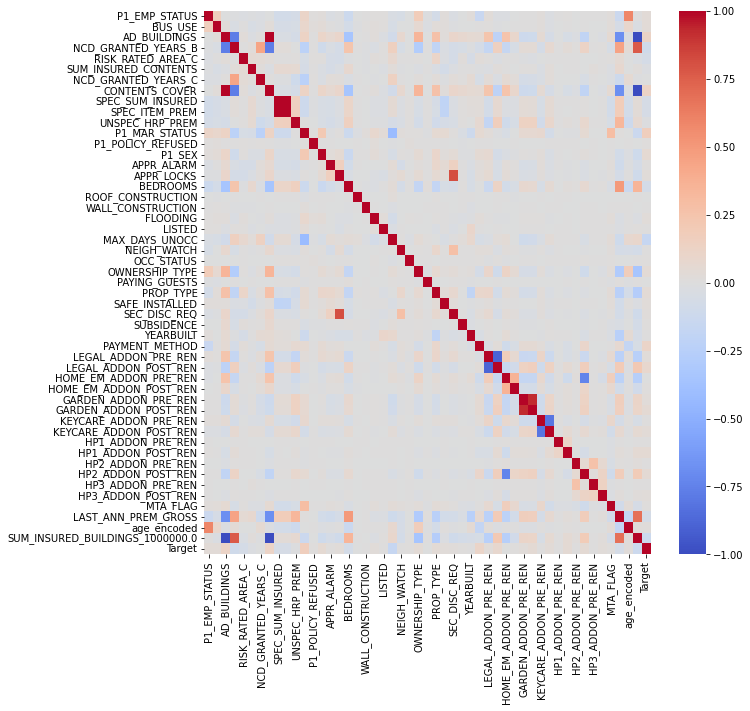

In [ ]:
Correlation = X_train_all.iloc[:, 1:].corr(method='spearman')

plt.figure(figsize=(10,10))
sns.heatmap(Correlation, annot = False,  vmin = -1, vmax =1, center =0,cmap="coolwarm")
plt.show()

2    101122
1     39757
0      3340
Name: Target, dtype: int64


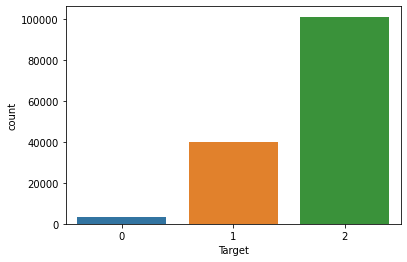

In [ ]:

print(X_train_all['Target'].value_counts())
sns.countplot(x= 'Target', data= X_train_all)

In [ ]:
#Extract most impartant features

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50, class_weight = 'balanced')
clf = clf.fit(X_train_sc, y_train.values.ravel())
features =clf.feature_importances_ 
best_9 = features.argsort()[-9:][::-1] +1
print(best_9)

49


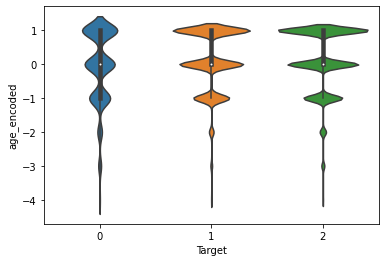

6


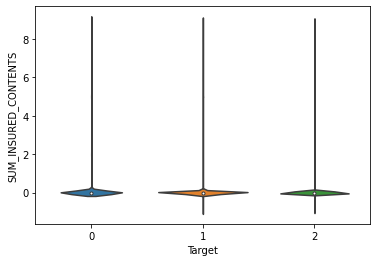

33


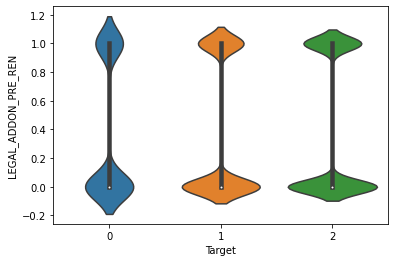

28


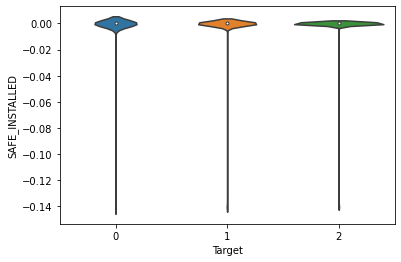

32


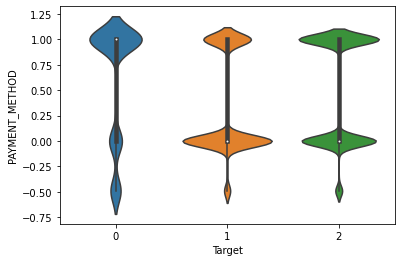

13


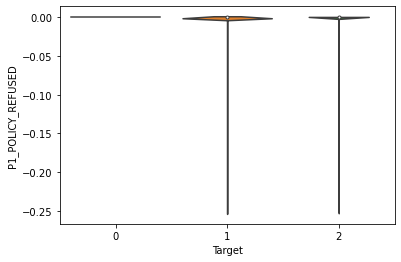

18


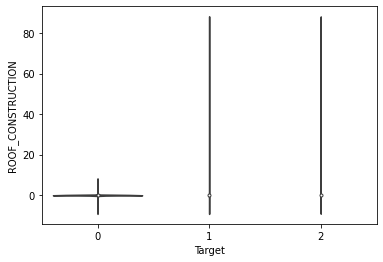

50


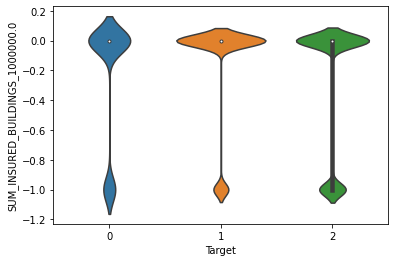

12


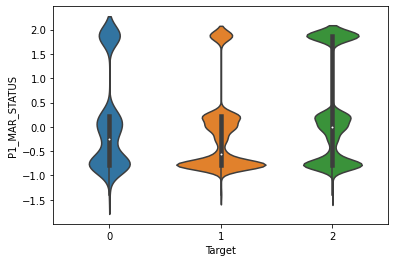

In [ ]:
for i in best_9:
    print(i)
    sns.violinplot(x=X_train_all['Target'], y=X_train_all.iloc[:,i])
    plt.show()

# Machine_Learning_Modelling

In [ ]:
print('Random Forest Optimisation')
parameters = {
    "max_depth": [5, 10, 15,50],
    "n_estimators": [10, 50, 100,200],
    "class_weight":['balanced','balanced_subsample'],
    "criterion": ['gini', 'entropy'],
    "max_features" : ["auto", "sqrt", "log2"]
}
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, return_train_score=True, scoring='f1_macro')
grid_search = grid_search.fit(X_train_sc, y_train.values.ravel())
print(grid_search.best_params_)

Random Forest Optimisation
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(max_depth=None, n_estimators=100, criterion='gini', class_weight='balanced')
scores = cross_validate(RandomForestClassifier(max_features='sqrt', n_estimators=200, criterion='gini', class_weight='balanced', max_depth = 15), X_train_sc, y_train.values.ravel(), cv=3,scoring=('accuracy', 'f1_macro'), return_train_score=True)


In [ ]:
print("Training Score: " + str(np.average(scores['train_f1_macro'])))
print("Test Score: " + str(np.average(scores['test_f1_macro'])))

print("Training accuracy: " + str(np.average(scores['train_accuracy'])))
print("Test Score: " + str(np.average(scores['test_accuracy'])))

Training Score: 0.6327840593911764
Test Score: 0.4523870315305747
Training accuracy: 0.7497694478536115
Test Score: 0.6557804450176468


In [ ]:
print('AdaBoost_Optimization')

parameters = {
    "learning_rate": [0.01,  0.1 , 0.5],
    'algorithm':['SAMME', 'SAMME.R'],
    "n_estimators" :[25, 50, 100],

    
  
}
grid_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=parameters, return_train_score=True, scoring='f1_macro')
grid_search = grid_search.fit(X_train_sc, y_train.values.ravel())
print(grid_search.best_params_)

AdaBoost_Optimization
{'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}


In [ ]:
gb_clf = AdaBoostClassifier( learning_rate=0.5, algorithm = 'SAMME.R', n_estimators=100)
scores = cross_validate(gb_clf, X_train_sc, y_train.values.ravel(), cv=4,scoring=('accuracy', 'f1_macro'), return_train_score=True)


In [ ]:
print("Training Score: " + str(np.average(scores['train_f1_macro'])))
print("Test Score: " + str(np.average(scores['test_f1_macro'])))

print("Training accuracy: " + str(np.average(scores['train_accuracy'])))
print("Test Score: " + str(np.average(scores['test_accuracy'])))

Training Score: 0.38809120779106765
Test Score: 0.387471883669668
Training accuracy: 0.7343553898004768
Test Score: 0.7338700196365646


In [ ]:
parameters = {
    "learning_rate": [0.01,  0.1 , 0.5],
    "loss":["deviance"],
    "n_estimators" :[25, 100, 300],
    "criterion": ["friedman_mse", 'squared_error'],
    
  
}
grid_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=parameters, return_train_score=True, scoring='f1_macro')
grid_search = grid_search.fit(X_train_sc, y_train.values.ravel())
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'n_estimators': 300}

In [ ]:

gb_clf = GradientBoostingClassifier( learning_rate=0.5, criterion= 'friedman_mse', loss= 'deviance', n_estimators=300)
scores = cross_validate(gb_clf, X_train_sc, y_train.values.ravel(), cv=4,scoring=('accuracy','f1_macro'), return_train_score=True)


In [ ]:
print("Training Score: " + str(np.average(scores['train_f1_macro'])))
print("Test Score: " + str(np.average(scores['test_f1_macro'])))

print("Training accuracy: " + str(np.average(scores['train_accuracy'])))
print("Test accuracy: " + str(np.average(scores['test_accuracy'])))

Training Score: 0.5433323594190042
Test Score: 0.43755394534159836
Training accuracy: 0.7746390300926436
Test accuracy: 0.7461984870196208


In [ ]:
from sklearn.ensemble import VotingClassifier
rf = RandomForestClassifier(max_features='sqrt', n_estimators=200, criterion='gini', class_weight='balanced', max_depth = 15)


vc_clf = VotingClassifier(estimators=[ ("rf", rf), ("gr_boost", gb_clf)], 
                          n_jobs=-1, voting='soft')

scores = cross_validate(vc_clf, X_train_sc, y_train.values.ravel(), cv=5,scoring=('accuracy', 'f1_macro'), return_train_score=True)


In [ ]:
print("Training Score: " + str(np.average(scores['train_f1_macro'])))
print("Test Score: " + str(np.average(scores['test_f1_macro'])))

print("Training accuracy: " + str(np.average(scores['train_accuracy'])))
print("Test accuracy: " + str(np.average(scores['test_accuracy'])))

Training Score: 0.5997372335885098
Test Score: 0.4493687259748982
Training accuracy: 0.7860372073302601
Test accuracy: 0.743112900206928


In [ ]:
from sklearn.metrics import plot_confusion_matrix

vc_clf= rf.fit(X_train_sc, y_train.values.ravel())
predictions = vc_clf.predict(X_test_sc)
print(f1_score(y_test,predictions, average='macro'))


plot_confusion_matrix(vc_clf, X_test_sc, y_test)

# Deep_Learning

In [ ]:
print("Part2 - Model Training")




X_train_NN, X_valid_NN, y_train_NN, y_valid_NN = sklearn.model_selection.train_test_split(X_train_sc, y_train, test_size = 0.20)





Part2 - Model Training


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=5, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

## Parameter_Optimization

In [ ]:
import functools
from keras.utils import np_utils
import keras.backend as K
from itertools import product

#print(Weighted_categorical_crossentropy)

def w_categorical_crossentropy(y_true, y_pred, weights):
    nb_cl = len(weights)
    final_mask = K.zeros_like(y_pred[:, 0])
    y_pred_max = K.max(y_pred, axis=1)
    y_pred_max = K.expand_dims(y_pred_max, 1)
    y_pred_max_mat = K.equal(y_pred, y_pred_max)
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):

        final_mask += (K.cast(weights[c_t, c_p],K.floatx()) * K.cast(y_pred_max_mat[:, c_p] ,K.floatx())* K.cast(y_true[:, c_t],K.floatx()))
    return K.categorical_crossentropy(y_pred, y_true) * final_mask
w_array = np.ones((3,3))



ncce = functools.partial(w_categorical_crossentropy, weights=np.ones((3,3)))

ncce.__name__ ='w_categorical_crossentropy'

In [ ]:
nb_classes=3
Y_train_ = np_utils.to_categorical(y_train_NN, nb_classes)
Y_valid_ = np_utils.to_categorical(y_valid_NN, nb_classes)
Y_test= np_utils.to_categorical(y_test, nb_classes)
print(Y_train_)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
def batch_parameters (hp):

  print("Building Kerras")
  filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16)
  kernel_size=hp.Choice('conv_1_kernel', values = [3,5])

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice( name = 'activation', values=['relu', 'elu', 'tanh', 'selu'])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 0.001, 0.01, 0.1, 0.5])
  momentum = hp.Choice('momentum', [0.0, 0.2, 0.4, 0.6, 0.8, 0.9])

  model = keras.models.Sequential()
  model.add(keras.layers.Conv1D(filters,kernel_size, activation='relu', input_shape =  ( X_train_NN.shape[1],1)))
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Conv1D(filters, kernel_size, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(hp_units, activation = hp_activation))
  model.add(keras.layers.BatchNormalization(momentum =momentum))
  model.add(keras.layers.Dense(50, activation=hp_activation))
  model.add(keras.layers.BatchNormalization(momentum =momentum))
  model.add(keras.layers.Dense(50, activation=hp_activation))
  model.add(keras.layers.Dense(3, activation="softmax"))

  model.compile(loss='CategoricalCrossentropy',  optimizer= keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics = ['accuracy','CategoricalCrossentropy' ])
  return model


In [ ]:
def dropout_parameters(hp):

  print("Building Kerras")
  filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16)
  kernel_size=hp.Choice('conv_1_kernel', values = [3,5])

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  hp_activation = hp.Choice( name = 'activation', values=['relu', 'elu', 'tanh', 'selu'])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 0.001, 0.01, 0.1, 0.5])
 
  

  model = keras.models.Sequential()
  model.add(keras.layers.Conv1D(filters,kernel_size, activation='relu', input_shape =  ( X_train_NN.shape[1],1)))
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Conv1D(filters, kernel_size, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(hp_units, activation = hp_activation, kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.01)))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(hp_units, activation=hp_activation,kernel_initializer="he_normal" , kernel_regularizer=keras.regularizers.l1(0.01)))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(hp_units, activation=hp_activation,kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.01)))
  model.add(keras.layers.Dense(3, activation="softmax"))


  model.compile(loss='CategoricalCrossentropy',  optimizer= keras.optimizers.Adam(hp_learning_rate), metrics = ['accuracy','CategoricalCrossentropy'])
  #model.fit(X_train_NN, y_train_NN, epochs=epochs, validation_data=(X_valid_NN, y_valid_NN), verbose=0,callbacks =[es,rlr])
  #mse_test = model.evaluate(X_test_sc, y_test)
  #print('loss_test_set:{}, accuracy_test_set:{}'.format(mse_test[0], mse_test[1]))
  return model

In [ ]:
from tensorflow import keras
import keras_tuner as kt

def param_optimiz (model, x_train, y_train,x_test, y_test,name):
  model_tuner = kt.BayesianOptimization(
      model,
      objective='val_loss',
      max_trials=5,
      directory='test_dir',
      project_name=name,
  )

  model_tuner.search(x_train, y_train, epochs=3, validation_split=0.2)

  model_tuner.results_summary()


  models = model_tuner.get_best_models()
  best_param = model_tuner.get_best_hyperparameters()[0]
  best_model = models[0]
  #print('best_model:', best_model)
  #print('bestparam', best_param)


  mse_test = best_model.evaluate(x_test, y_test)
  #print("test loss, test acc:", mse_test)
  return best_model

In [ ]:

param_optimiz(batch_parameters, X_train_NN, y_train_NN, X_valid_NN, y_valid_NN, '001')

Trial 6 Complete [00h 00m 57s]
val_loss: 0.6285067796707153

Best val_loss So Far: 0.6285067796707153
Total elapsed time: 00h 05m 23s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in test_dir/001
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
units: 32
learning_rate: 0.0001
activation: selu
momentum: 0.8
Score: 0.6285067796707153
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
units: 32
learning_rate: 0.001
activation: selu
momentum: 0.0
Score: 0.6315628290176392
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 3
units: 32
learning_rate: 0.0001
activation: selu
momentum: 0.0
Score: 0.6324963569641113
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
units: 256
learning_rate: 0.01
activation: elu
momentum: 0.2
Score: 0.6363614201545715
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
units: 512
learning_rate: 0.01
activa

In [ ]:
param_optimiz(dropout_parameters, X_train_NN, y_train_NN,X_valid_NN,y_valid_NN, '01_')

Trial 5 Complete [00h 00m 47s]
val_loss: 0.9157317280769348

Best val_loss So Far: 0.7476253509521484
Total elapsed time: 00h 04m 43s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in test_dir/01_
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
units: 64
learning_rate: 0.001
activation: elu
Score: 0.7476253509521484
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 3
units: 32
learning_rate: 0.01
activation: relu
Score: 0.842663586139679
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
units: 32
learning_rate: 0.0001
activation: relu
Score: 0.9157317280769348
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
units: 416
learning_rate: 0.0001
activation: relu
Score: 1.1225032806396484
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
units: 32
learning_rate: 0.01
activation: selu
Score: 1.234922170639038
Building Kerras
902/90

## Running Model

In [ ]:
class_weights =  {0: 2.5333333333333333, 1: 2, 2: 1}

def batch_norm_model(train_shape1, epochs):

  model = keras.models.Sequential()
  model.add(keras.layers.Conv1D(128,kernel_size=5, activation='relu', input_shape =  ( train_shape1,1)))
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Conv1D(128, kernel_size=5, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation = 'selu'))
  model.add(tf.keras.layers.BatchNormalization(momentum =0.8))
  model.add(keras.layers.Dense(32, activation='selu'))
  model.add(tf.keras.layers.BatchNormalization(momentum =0.8))
  model.add(keras.layers.Dense(32, activation='selu'))
  model.add(keras.layers.Dense(3, activation='softmax'))


  model.compile(loss='sparse_categorical_crossentropy',  optimizer= tf.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])
  history = model.fit(X_train_NN, y_train_NN, epochs=epochs, class_weight = class_weights, validation_data=(X_valid_NN, y_valid_NN), verbose=1,callbacks =[es,rlr])
  mse_test = model.evaluate(X_test_sc, y_test)
  #print('loss_test_set:{}, accuracy_test_set:{}'.format(mse_test[0], mse_test[1]))
  return model,history, epochs

In [ ]:
def dropout_model (train_shape1, epochs):

  model = keras.models.Sequential()
  model.add(keras.layers.Conv1D(80,kernel_size=3, activation='relu', input_shape =  (train_shape1,1)))
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Conv1D(80, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Conv1D(80, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation = 'elu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(64, activation='elu',kernel_initializer="he_normal" , kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(64, activation='elu',kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(keras.layers.Dense(3, activation='softmax'))


  model.compile(loss='sparse_categorical_crossentropy',  optimizer= tf.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])
  history = model.fit(X_train_NN, y_train_NN, epochs=epochs, validation_data=(X_valid_NN, y_valid_NN), verbose=0,callbacks =[es,rlr])
  mse_test = model.evaluate(X_test_sc, y_test)
  print('loss_test_set:{}, accuracy_test_set:{}'.format(mse_test[0], mse_test[1]))
  return model, history, epochs

In [ ]:
def plot_history (history, no_epochs):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(35)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()



Epoch 1/100
3606/3606 [==============================] - 24s 6ms/step - loss: 1.0473 - accuracy: 0.6528 - val_loss: 0.6922 - val_accuracy: 0.6776 - lr: 1.0000e-04
Epoch 2/100
3606/3606 [==============================] - 23s 6ms/step - loss: 1.0031 - accuracy: 0.6713 - val_loss: 0.7049 - val_accuracy: 0.6805 - lr: 1.0000e-04
Epoch 3/100
3606/3606 [==============================] - 22s 6ms/step - loss: 0.9975 - accuracy: 0.6744 - val_loss: 0.6761 - val_accuracy: 0.6980 - lr: 1.0000e-04
Epoch 4/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.9975 - accuracy: 0.6753 - val_loss: 0.6968 - val_accuracy: 0.6475 - lr: 1.0000e-04
Epoch 5/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.9914 - accuracy: 0.6751 - val_loss: 0.6767 - val_accuracy: 0.6601 - lr: 1.0000e-04
Epoch 6/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.9875 - accuracy: 0.6767 - val_loss: 0.7080 - val_accuracy: 0.6695 - lr: 1.0000e-04
Epoch 7/100
3606/3606 

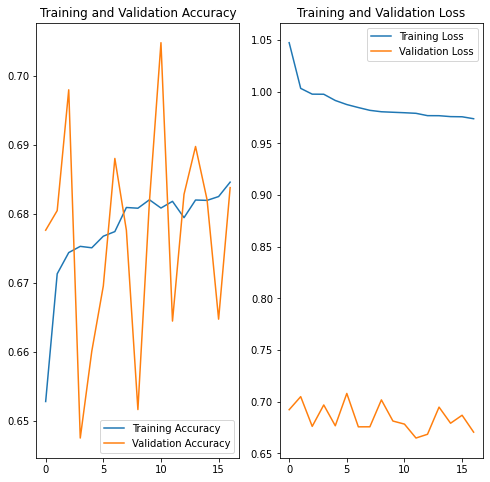

In [ ]:
#Batch__Norm_weighted_Class

model, history, epochs = batch_norm_model(X_train_NN.shape[1],100)

plot_history(history,epochs)

Epoch 1/100
3606/3606 [==============================] - 23s 6ms/step - loss: 0.6845 - accuracy: 0.7063 - val_loss: 0.6430 - val_accuracy: 0.7276 - lr: 1.0000e-04
Epoch 2/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.6355 - accuracy: 0.7226 - val_loss: 0.6307 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 3/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.6293 - accuracy: 0.7252 - val_loss: 0.6347 - val_accuracy: 0.7275 - lr: 1.0000e-04
Epoch 4/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.6269 - accuracy: 0.7280 - val_loss: 0.6264 - val_accuracy: 0.7285 - lr: 1.0000e-04
Epoch 5/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.6233 - accuracy: 0.7285 - val_loss: 0.6212 - val_accuracy: 0.7308 - lr: 1.0000e-04
Epoch 6/100
3606/3606 [==============================] - 21s 6ms/step - loss: 0.6233 - accuracy: 0.7286 - val_loss: 0.6259 - val_accuracy: 0.7289 - lr: 1.0000e-04
Epoch 7/100
3606/3606 

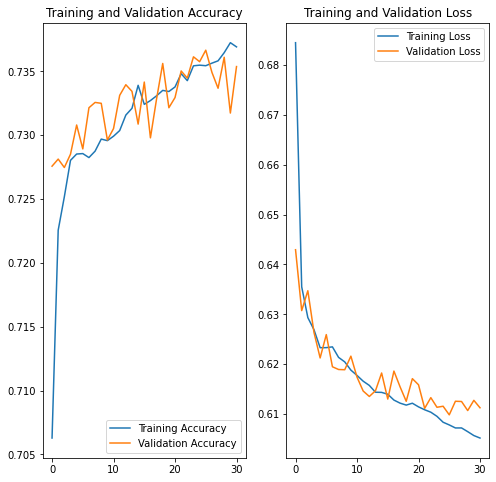

In [ ]:
#Batch__Norm_Weighted_loss

model, history, epochs = batch_norm_model(X_train_NN.shape[1],100)

plot_history(history,epochs)

Epoch 32: early stopping
1127/1127 [==============================] - 3s 3ms/step - loss: 0.6148 - accuracy: 0.7419
loss_test_set:0.6148185729980469, accuracy_test_set:0.7419158220291138


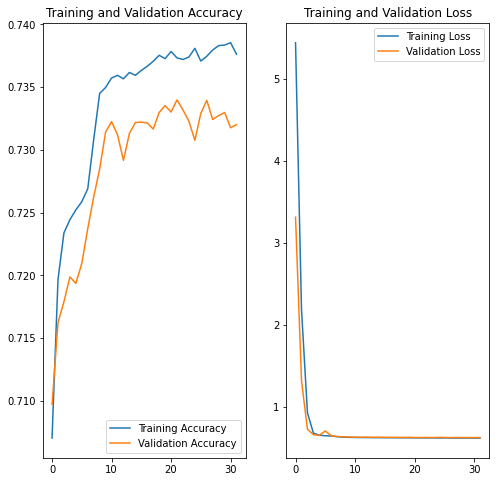

In [ ]:
#Dropout_Model_

model, history, epochs = dropout_model(X_train_NN.shape[1],100)

plot_history(history,epochs)

# Evaluate and Predict

In [ ]:
def evaluation_test(model_, x_test_set, y_test_set):
  y_test_pred = model_.predict(x_test_set)
  y_pred = pd.DataFrame(y_test_pred, index =  y_test_set.index)
  #print(y_pred.shape)


  Y =pd.concat([y_test_set, y_pred], axis =1)
  Y.columns  = ['label','0', '1','2']
  Y = Y.sort_index()

  Y['assigned_class'] = Y.iloc[:, 1:].idxmax(axis=1).astype(int)
  print(Y.head())
  return Y



### Dropout results_no weighted loss

In [ ]:
Y= evaluation_test(model, X_test_sc, y_test)

    label         0         1         2  assigned_class
2       2  0.023186  0.104299  0.872515               2
5       2  0.023213  0.107503  0.869284               2
6       2  0.022739  0.204612  0.772649               2
8       2  0.023125  0.084528  0.892347               2
12      2  0.022888  0.179676  0.797436               2


In [ ]:
Y.label.value_counts()

2    25164
1    10051
0      840
Name: label, dtype: int64

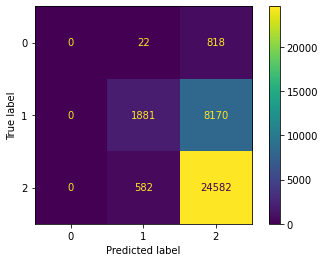

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( Y.iloc[:,0],Y.iloc[:,4])

### Batch_Norm Weighted loss

In [ ]:
Y= evaluation_test(model, X_test_sc, y_test)

    label             0             1    2  assigned_class
2       2  2.048793e-11  6.129249e-15  1.0               2
5       2  1.395719e-12  1.171731e-14  1.0               2
6       2  1.559440e-10  4.067746e-12  1.0               2
8       2  7.007507e-10  4.297785e-14  1.0               2
12      2  5.838231e-10  5.961183e-11  1.0               2


In [ ]:
Y.label.value_counts()

2    25164
1    10051
0      840
Name: label, dtype: int64

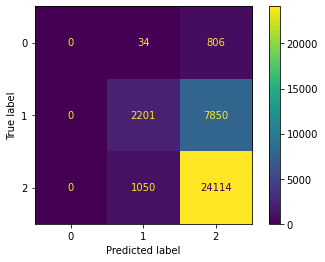

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( Y.iloc[:,0],Y.iloc[:,4])

### BatchNorm_weighted class

In [ ]:
Y= evaluation_test(model, X_test_sc, y_test)

    label         0         1         2  assigned_class
2       2  0.040361  0.115437  0.844202               2
5       2  0.030337  0.125402  0.844261               2
6       2  0.007812  0.380033  0.612155               2
8       2  0.040263  0.154423  0.805314               2
12      2  0.008380  0.324918  0.666702               2


In [ ]:
Y.label.value_counts()

2    25164
1    10051
0      840
Name: label, dtype: int64

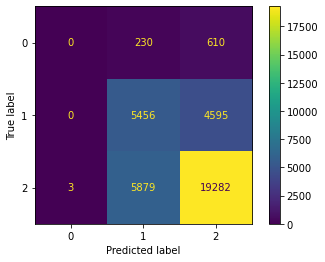

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( Y.iloc[:,0],Y.iloc[:,4])